In [2]:
%pylab inline

from sir import Sir
from fit_sir import FitSir
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


0.0005712429311654435
0.000564071958447


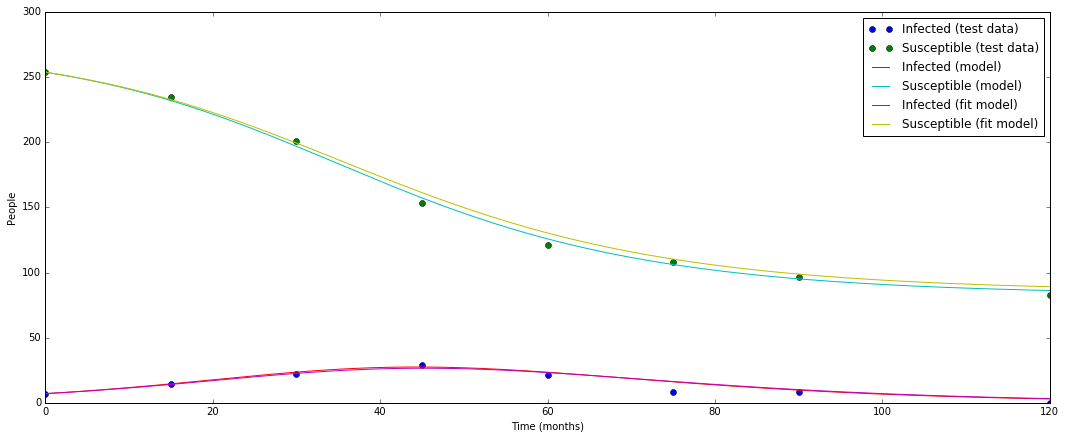

In [5]:
# Eyam Plague 1666

plt.figure(figsize=(18, 7));
plt.xlabel("Time (months)");
plt.ylabel("People");

data_t = [0, 15, 30, 45, 60, 75, 90, 120]
data_s = [254, 235, 201, 153.5, 121, 108, 97, 83]
data_i = [7, 14.5, 22, 29, 21, 8, 8, 0]

plot(data_t, data_i, "o", label="Infected (test data)")
plot(data_t, data_s, "o", label="Susceptible (test data)")

inf = len(data_s) - 1
alpha = 1 / 11
a_b_ratio = (data_i[0] + data_s[0] - data_s[inf]) / (math.log(data_s[0]) - math.log(data_s[inf]))
beta = alpha / a_b_ratio

print(beta)

sir = Sir(data_s[0], data_i[0], 0, beta, alpha)
res = sir.simulate(data_t[inf], sim_step=0.1, precision=0.1)
plt.plot(res.t, res.I, label="Infected (model)")
plt.plot(res.t, res.S, label="Susceptible (model)")


f_sir = FitSir(sir, data_i, data_t, 0.1, 0.000001)
f_beta  = f_sir.fit(0.0005, 0.00000000001)
print(f_beta)


sir = Sir(data_s[0], data_i[0], 0, f_beta, alpha)
res = sir.simulate(data_t[inf], sim_step=0.1, precision=1)
plt.plot(res.t, res.I, label="Infected (fit model)")
plt.plot(res.t, res.S, label="Susceptible (fit model)")

plt.legend()